In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spateo as st
import anndata

2023-10-11 21:57:12.928470: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-11 21:57:12.972154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 21:57:13.559551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is cur

In [2]:
import os

os.chdir('/home/mowp/workspace/single_cell_analysis/spateo')

In [22]:
# adata = st.sample_data.axolotl(filename='axolotl_2DPI.h5ad')
adata = anndata.read_h5ad('axolotl_2DPI.h5ad')
adata

AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', '__type', 'color_key'
    obsm: 'X_spatial', 'spatial'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

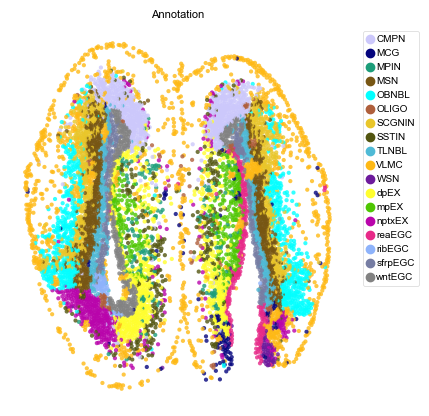

In [23]:
st.pl.space(adata,
            color=['Annotation'],
            pointsize=0.2,
            color_key=adata.uns['color_key'],
            show_legend='upper left',
            figsize=(5, 5))

# Find spatially adjacent celltypes

In [24]:
def plot_specific_cell_type(adata, celltypes: list, other_color='#EEEEEEFF', figsize=(5, 5)):
    """
    Plot specific cell type with given color.
    """

    colormap = adata.uns['color_key'].copy()
    for _celltype in colormap:
        if _celltype not in celltypes:
            colormap[_celltype] = other_color

    st.pl.space(adata,
                color=['Annotation'],
                pointsize=0.2,
                color_key=colormap,
                show_legend='upper left',
                figsize=figsize)

In [25]:
# weighted spatial graph between celltypes
weights_graph, distance_graph, adata = st.tl.weighted_spatial_graph(
    adata,
    n_neighbors=10,
    fixed='n_neighbors',
)

# The spatial graphs and spatial distances are saves to 
# adata.obsp['spatial_distances'],adata.obsp['spatial_weights'],adata.obsp['spatial_connectivities'] ,adata.uns['spatial_neighbors']

|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.


In [26]:
adata

AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', '__type', 'color_key', 'spatial_neighbors'
    obsm: 'X_spatial', 'spatial'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances', 'spatial_weights'

In [27]:
weights_graph

<7668x7668 sparse matrix of type '<class 'numpy.float64'>'
	with 76680 stored elements in Compressed Sparse Row format>

|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.
|-----> 
--- 18 labels, 7668 samples ---
initalized (19,) index ptr: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
initalized (7668,) indices: [0 0 0 ... 0 0 0]
initalized (7668,) data: [1 1 1 ... 1 1 1]

|-----> Deep copying AnnData object and working on the new copy. Original AnnData object will not be modified.
|-----> Matrix multiplying labels x weights x labels-transpose, shape (18, 7668) x (7668, 7668) x (7668, 18).


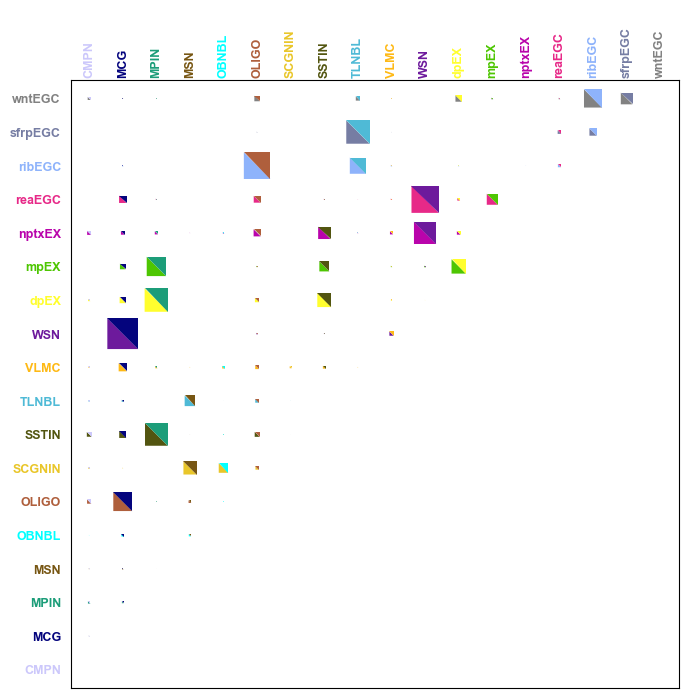

In [28]:
st.pl.plot_connections(
    adata,
    cat_key='Annotation',
    save_show_or_return='show',
    title_str=" ",
    title_fontsize=9,
    label_fontsize=9,
    colormap=adata.uns['color_key'],
    figsize=(8, 8),
)

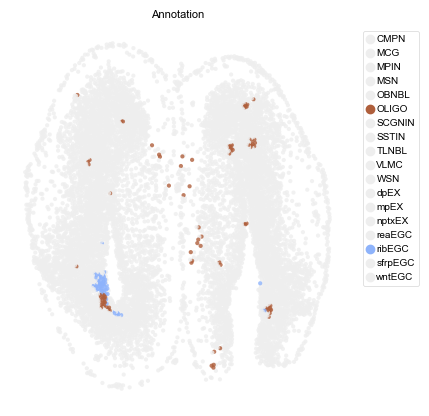

In [29]:
plot_specific_cell_type(adata, celltypes=['ribEGC', 'OLIGO'])

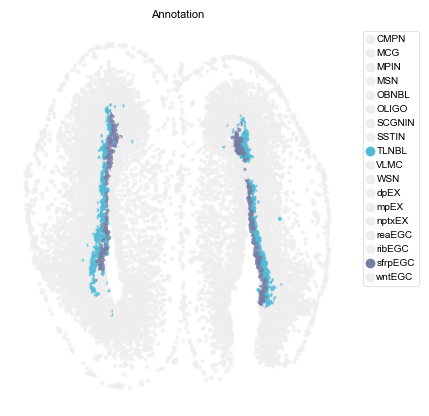

In [31]:
plot_specific_cell_type(adata, celltypes=['sfrpEGC', 'TLNBL'])

# Given two celltypes, find space-specific ligand-receptor pairs.

In [32]:
adata = anndata.read_h5ad('axolotl_2DPI_right.h5ad')
adata

AnnData object with n_obs × n_vars = 3625 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', '__type', 'color_key'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [33]:
sender_ct = 'reaEGC'
receptor_ct = 'WSN'

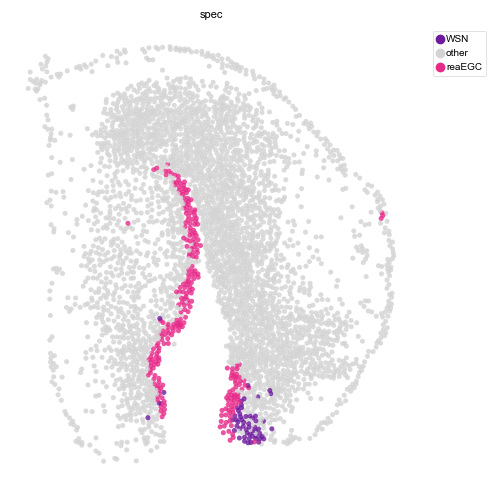

In [34]:
st.tl.prepare_cci_cellpair_adata(
    adata, 
    sender_group=sender_ct,
    receiver_group=receptor_ct, 
    group='Annotation', 
    all_cell_pair=True)

# plot all cell pair
st.pl.space(adata,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', 
                       sender_ct: adata.uns['color_key'][sender_ct], 
                       receptor_ct: adata.uns['color_key'][receptor_ct]},
            show_legend='upper left',
            figsize=(6, 6),
            save_show_or_return='show',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_all_cell_pair"}
            )

In [ ]:
# st.tl.prepare_cci_cellpair_adata: Updated AnnData object containing 'spec' in .obs.

adata.obs['spec'].astype('category')

CELL.8       other
CELL.9       other
CELL.10      other
CELL.11      other
CELL.12      other
             ...  
CELL.4059    other
CELL.4070    other
CELL.4075    other
CELL.4077    other
CELL.4086    other
Name: spec, Length: 3625, dtype: category
Categories (3, object): ['WSN', 'other', 'reaEGC']

In [40]:
weights_graph, distance_graph, adata = st.tl.weighted_spatial_graph(
    adata,
    n_neighbors=10,
)

|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.


In [41]:
# updated .obsp with spatial_connectivities, spatial_distances, spatial_weights
adata.obsp

PairwiseArrays with keys: connectivities, distances, spatial_connectivities, spatial_distances, spatial_weights

In [42]:
res = st.tl.find_cci_two_group(adata,
                               path='/home/mowp/software/spateo-release/spateo/tools/database/',
                               species='axolotl',
                               group='Annotation',
                               sender_group=sender_ct,
                               receiver_group=receptor_ct,
                               filter_lr='outer',
                               min_pairs=0,
                               min_pairs_ratio=0,
                               top=20,)

|-----> 20 ligands for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD008914', 'AMEX60DD001392', 'AMEX60DD049490', 'AMEX60DD051636', 'AMEX60DD041932', 'AMEX60DD008951', 'AMEX60DD028699', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD001946', 'AMEX60DD013396', 'AMEX60DD055544', 'AMEX60DD043190', 'AMEX60DD005285', 'AMEX60DD003208', 'AMEX60DD014882', 'AMEX60DD040292', 'AMEX60DD012285', 'AMEX60DD029944', 'AMEX60DD008217']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN with highest fraction of prevalence: ['AMEX60DD051542', 'AMEX60DD042067', 'AMEX60DD033101', 'AMEX60DD055551', 'AMEX60DD000016', 'AMEX60DD014152', 'AMEX60DD029326', 'AMEX60DD029894', 'AMEX60DD055776', 'AMEX60DD008017', 'AMEX60DD018191', 'AMEX60DD029929', 'AMEX60DD027855', 'AMEX60DDU001007023', 'AMEX60DD009754', 'AMEX60DDU001005617', 'AMEX60DD051881', 'AMEX60DD041858', 'AMEX60DD055467', 'AMEX60DD049635']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 130.60it/s]


In [46]:
res.keys()

dict_keys(['cell_pair', 'lr_pair'])

In [47]:
res['cell_pair']

,cell_pair_name,cell_sender,cell_receiver
10321,CELL.1199>-<CELL.1272,CELL.1199,CELL.1272
10322,CELL.1199>-<CELL.1159,CELL.1199,CELL.1159
10323,CELL.1199>-<CELL.1096,CELL.1199,CELL.1096
10324,CELL.1199>-<CELL.1326,CELL.1199,CELL.1326
10325,CELL.1199>-<CELL.1319,CELL.1199,CELL.1319
...,...,...,...
25561,CELL.2774>-<CELL.2800,CELL.2774,CELL.2800
25586,CELL.2777>-<CELL.2723,CELL.2777,CELL.2723
25784,CELL.2799>-<CELL.2723,CELL.2799,CELL.2723
25976,CELL.2819>-<CELL.2723,CELL.2819,CELL.2723


In [48]:
res['lr_pair']

,from,to,human_ligand,human_receptor,lr_pair,lr_product,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,is_significant,lr_co_exp_ratio_qvalues,is_significant_fdr,sr_pair
190,AMEX60DD013396,AMEX60DD055305,SERPINE1,ITGAV,SERPINE1-ITGAV,0.006673,1,0.013889,0.114,False,0.496235,False,reaEGC-WSN
191,AMEX60DD013396,AMEX60DD029732,SERPINE1,LRP1,SERPINE1-LRP1,0.000000,0,0.000000,1.000,False,1.000000,False,reaEGC-WSN
192,AMEX60DD013396,AMEX60DD056076,SERPINE1,ITGB5,SERPINE1-ITGB5,0.000000,0,0.000000,1.000,False,1.000000,False,reaEGC-WSN
534,AMEX60DD029944,AMEX60DD030011,GDF11,ACVR1B,GDF11-ACVR1B,0.000000,0,0.000000,1.000,False,1.000000,False,reaEGC-WSN
535,AMEX60DD029944,AMEX60DD054991,GDF11,BMPR2,GDF11-BMPR2,0.010576,1,0.013889,0.223,False,0.942971,False,reaEGC-WSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,AMEX60DD009927,AMEX60DD055776,NPY,DPP4,NPY-DPP4,0.000000,0,0.000000,1.000,False,1.000000,False,reaEGC-WSN
3158,AMEX60DD027633,AMEX60DD055776,ADA,DPP4,ADA-DPP4,0.000000,0,0.000000,1.000,False,1.000000,False,reaEGC-WSN
3284,AMEX60DD045792,AMEX60DD033101,SLIT2,SDC1,SLIT2-SDC1,0.000000,0,0.000000,1.000,False,1.000000,False,reaEGC-WSN
3392,AMEX60DD039450,AMEX60DDU001005617,ADCYAP1,GPR84,ADCYAP1-GPR84,0.021153,2,0.027778,0.004,True,0.023680,True,reaEGC-WSN


(None, [<AxesSubplot:title={'center':'spec'}>])

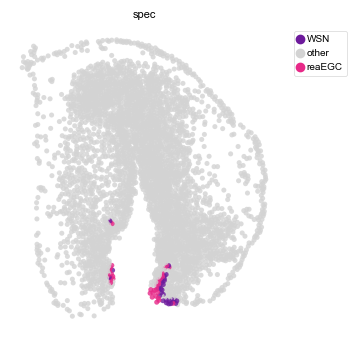

In [43]:
# update .obs['spec'] with cci
# 空间上邻近的细胞对
st.tl.prepare_cci_cellpair_adata(
    adata, sender_group=sender_ct, receiver_group=receptor_ct, cci_dict=res, all_cell_pair=False)
# plot

st.pl.space(adata,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['color_key']
                       [sender_ct], receptor_ct: adata.uns['color_key'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='return',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_cell_pair"}
            )

In [49]:
df = res['lr_pair']
df = df.loc[df['lr_co_exp_num'] > 0].sort_values(
    'lr_co_exp_ratio', ascending=False)[0:10]

In [50]:
df

,from,to,human_ligand,human_receptor,lr_pair,lr_product,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,is_significant,lr_co_exp_ratio_qvalues,is_significant_fdr,sr_pair
2321,AMEX60DD055544,AMEX60DD002665,COL18A1,GPC1,COL18A1-GPC1,0.135889,13,0.180556,0.0,True,0.0,True,reaEGC-WSN
732,AMEX60DD050822,AMEX60DD033101,TNC,SDC1,TNC-SDC1,0.216852,12,0.166667,0.0,True,0.0,True,reaEGC-WSN
734,AMEX60DD050822,AMEX60DD009754,TNC,ITGB3,TNC-ITGB3,0.382080,12,0.166667,0.0,True,0.0,True,reaEGC-WSN
1388,AMEX60DD007022,AMEX60DD033101,PTN,SDC1,PTN-SDC1,0.165080,12,0.166667,0.0,True,0.0,True,reaEGC-WSN
579,AMEX60DD012285,AMEX60DD009754,THBS1,ITGB3,THBS1-ITGB3,0.177383,11,0.152778,0.0,True,0.0,True,reaEGC-WSN
1427,AMEX60DD055544,AMEX60DD009754,COL18A1,ITGB3,COL18A1-ITGB3,0.138643,10,0.138889,0.0,True,0.0,True,reaEGC-WSN
1498,AMEX60DD028699,AMEX60DD009754,TGM2,ITGB3,TGM2-ITGB3,0.147344,10,0.138889,0.0,True,0.0,True,reaEGC-WSN
572,AMEX60DD049502,AMEX60DD055396,MMP7,ERBB4,MMP7-ERBB4,0.096337,10,0.138889,0.0,True,0.0,True,reaEGC-WSN
582,AMEX60DD012285,AMEX60DD055675,THBS1,ITGA6,THBS1-ITGA6,0.108807,9,0.125000,0.0,True,0.0,True,reaEGC-WSN
1030,AMEX60DD001392,AMEX60DD055396,TGFA,ERBB4,TGFA-ERBB4,0.080222,7,0.097222,0.0,True,0.0,True,reaEGC-WSN


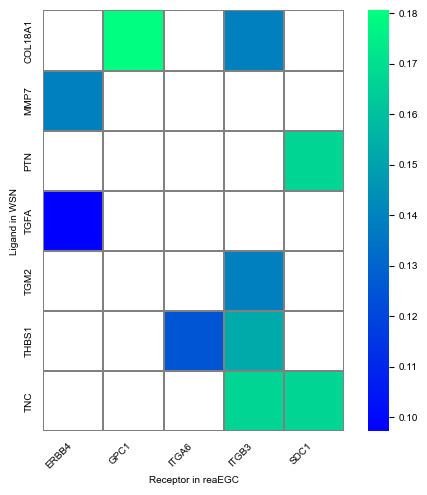

In [51]:
# %matplotlib inline
data1 = df.iloc[:, [2, 3, 7]]
test = data1.pivot(index="human_ligand", columns="human_receptor",
                   values="lr_co_exp_ratio").fillna(0)
fig = plt.figure()
fig.set_size_inches(5, 5)
x_label = list(test.columns.tolist())
y_label = list(test.index)
ax = sns.heatmap(test,
                 cmap="winter",
                 square=True,
                 yticklabels=y_label,
                 linecolor='grey',
                 linewidths=0.3,
                 annot_kws={'size': 10, 'weight': 'bold', },
                 xticklabels=x_label,
                 mask=(test < 0.01))
plt.gcf().subplots_adjust(bottom=0.3)
plt.xlabel("Receptor in reaEGC")
plt.ylabel("Ligand in WSN")
ax.set_xticklabels(x_label, rotation=45, ha="right")
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.tight_layout()
#plt.savefig("./figures/2DPI_sub_cci_WSN_ReaEGC_heatmap.pdf", transparent=True)

In [52]:
test

human_receptor,ERBB4,GPC1,ITGA6,ITGB3,SDC1
human_ligand,,,,,
COL18A1,0.000000,0.180556,0.000,0.138889,0.000000
MMP7,0.138889,0.000000,0.000,0.000000,0.000000
PTN,0.000000,0.000000,0.000,0.000000,0.166667
TGFA,0.097222,0.000000,0.000,0.000000,0.000000
TGM2,0.000000,0.000000,0.000,0.138889,0.000000
THBS1,0.000000,0.000000,0.125,0.152778,0.000000
TNC,0.000000,0.000000,0.000,0.166667,0.166667


# (Optional) Loop executes multiple two-cell type interactions

In the case of multiple cell types interacting in a region, the following code can be run. Here we choose the reigon of injury of 2DPI datasets of axolotl. In this microenvironment, these types of cells(reaEGC,MCG,WSN, nptxEX) may interact and cause regeneration to occur.
如果在一个区域中有多种细胞类型交互，则可以运行以下代码。在这里，选择的损伤区域的2DPI数据集的美西螈。在这种微环境中，这些类型的细胞（ reaEGC ， MCG ， WSN ， nptxEX ）可能相互作用并导致再生发生。

In [15]:
a = ['reaEGC', 'MCG', 'WSN', 'nptxEX']

In [16]:
# construct the celltype pairs in this reigion.

df = pd.DataFrame({
    "celltype_sender": np.repeat(a, len(a)),
    "celltype_receiver": list(a)*len(a),
})
df = df[df['celltype_sender'] != df['celltype_receiver']]
df["celltype_pair"] = df["celltype_sender"].str.cat(
    df["celltype_receiver"], sep="-")
df

,celltype_sender,celltype_receiver,celltype_pair
1,reaEGC,MCG,reaEGC-MCG
2,reaEGC,WSN,reaEGC-WSN
3,reaEGC,nptxEX,reaEGC-nptxEX
4,MCG,reaEGC,MCG-reaEGC
6,MCG,WSN,MCG-WSN
7,MCG,nptxEX,MCG-nptxEX
8,WSN,reaEGC,WSN-reaEGC
9,WSN,MCG,WSN-MCG
11,WSN,nptxEX,WSN-nptxEX
12,nptxEX,reaEGC,nptxEX-reaEGC


In [18]:
# Second, calculate the cell pairs and ligand-receptor pairs which interact significantly.
res = {}
for i in df['celltype_pair']:
    s, r = i.split(sep='-')
    res[i] = st.tl.find_cci_two_group(adata,
                                      path='/home/mowp/software/spateo-release/spateo/tools/database/',
                                      species='axolotl',
                                      group='Annotation',
                                      sender_group=s,
                                      receiver_group=r,
                                      filter_lr='outer',
                                      min_pairs=0,
                                      min_pairs_ratio=0,
                                      top=20,)
result = pd.DataFrame(columns=res[df['celltype_pair'][1]]['lr_pair'].columns)
for l in df.index:
    res[df['celltype_pair'][l]]['lr_pair'] = res[df['celltype_pair'][l]
                                                 ]['lr_pair'].sort_values('lr_co_exp_ratio', ascending=False)[0:3]
    result = pd.concat([result, res[df['celltype_pair'][l]]
                       ['lr_pair']], axis=0, join='outer')

df_result = result.loc[result['lr_co_exp_num'] > 5]
df_result.drop_duplicates(
    subset=['lr_pair', 'sr_pair', ], keep='first', inplace=True)

|-----> 20 ligands for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD008914', 'AMEX60DD001392', 'AMEX60DD049490', 'AMEX60DD051636', 'AMEX60DD008951', 'AMEX60DD041932', 'AMEX60DD028699', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD001946', 'AMEX60DD013396', 'AMEX60DD055544', 'AMEX60DD003208', 'AMEX60DD043190', 'AMEX60DD005285', 'AMEX60DD014882', 'AMEX60DD040292', 'AMEX60DD012285', 'AMEX60DD029944', 'AMEX60DD001694']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type MCG with highest fraction of prevalence: ['AMEX60DD044621', 'AMEX60DD045536', 'AMEX60DD031598', 'AMEX60DD030144', 'AMEX60DD027843', 'AMEX60DD055178', 'AMEX60DD025098', 'AMEX60DD009964', 'AMEX60DD001963', 'AMEX60DDU001005617', 'AMEX60DD001912', 'AMEX60DD037922', 'AMEX60DD048520', 'AMEX60DD018338', 'AMEX60DD001207', 'AMEX60DD051542', 'AMEX60DD033101', 'AMEX60DD055359', 'AMEX60DD030160', 'AMEX60DD021663']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 128.69it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD008914', 'AMEX60DD001392', 'AMEX60DD049490', 'AMEX60DD051636', 'AMEX60DD008951', 'AMEX60DD041932', 'AMEX60DD028699', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD001946', 'AMEX60DD013396', 'AMEX60DD055544', 'AMEX60DD003208', 'AMEX60DD043190', 'AMEX60DD005285', 'AMEX60DD014882', 'AMEX60DD040292', 'AMEX60DD012285', 'AMEX60DD029944', 'AMEX60DD001694']. Testing interactions involving these genes.
|-----> 20 receptors for cell type WSN with highest fraction of prevalence: ['AMEX60DD018191', 'AMEX60DD042067', 'AMEX60DD014152', 'AMEX60DD049635', 'AMEX60DD008017', 'AMEX60DDU001005617', 'AMEX60DD029326', 'AMEX60DD041858', 'AMEX60DD027855', 'AMEX60DD051881', 'AMEX60DD055551', 'AMEX60DDU001007023', 'AMEX60DD055776', 'AMEX60DD055467', 'AMEX60DD029894', 'AMEX60DD009754', 'AMEX60DD051542', 'AMEX60DD000016', 'AMEX60DD033101', 'AMEX60DD029929']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

100%|██████████| 1000/1000 [00:08<00:00, 122.87it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD008914', 'AMEX60DD001392', 'AMEX60DD049490', 'AMEX60DD051636', 'AMEX60DD008951', 'AMEX60DD041932', 'AMEX60DD028699', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD001946', 'AMEX60DD013396', 'AMEX60DD055544', 'AMEX60DD003208', 'AMEX60DD043190', 'AMEX60DD005285', 'AMEX60DD014882', 'AMEX60DD040292', 'AMEX60DD012285', 'AMEX60DD029944', 'AMEX60DD001694']. Testing interactions involving these genes.
|-----> 20 receptors for cell type nptxEX with highest fraction of prevalence: ['AMEX60DD009334', 'AMEX60DD034378', 'AMEX60DD029326', 'AMEX60DD009634', 'AMEX60DD047185', 'AMEX60DD011957', 'AMEX60DD035890', 'AMEX60DD016175', 'AMEX60DD045542', 'AMEX60DD033647', 'AMEX60DD009754', 'AMEX60DD051542', 'AMEX60DD039367', 'AMEX60DD033101', 'AMEX60DDU001033895', 'AMEX60DD042223', 'AMEX60DD030160', 'AMEX60DD021663', 'AMEX60DD033778', 'AMEX60DD043107']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

100%|██████████| 1000/1000 [00:06<00:00, 161.73it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type MCG with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD013396', 'AMEX60DD015004', 'AMEX60DD038300', 'AMEX60DD005285', 'AMEX60DD052070', 'AMEX60DD028514', 'AMEX60DD001946', 'AMEX60DD028699', 'AMEX60DD054671', 'AMEX60DD054221', 'AMEX60DD027633', 'AMEX60DD033437', 'AMEX60DD049259', 'AMEX60DD027336', 'AMEX60DD006711', 'AMEX60DD033981', 'AMEX60DD009962']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD042348', 'AMEX60DD055675', 'AMEX60DD017554', 'AMEX60DD001404', 'AMEX60DD030798', 'AMEX60DD014152', 'AMEX60DD025567', 'AMEX60DD049635', 'AMEX60DD015696', 'AMEX60DD008017', 'AMEX60DD027855', 'AMEX60DD009877', 'AMEX60DD011957', 'AMEX60DD024484', 'AMEX60DD053573', 'AMEX60DD019369', 'AMEX60DD022702', 'AMEX60DD004560', 'AMEX60DD031636', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 127.95it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type MCG with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD013396', 'AMEX60DD015004', 'AMEX60DD038300', 'AMEX60DD005285', 'AMEX60DD052070', 'AMEX60DD028514', 'AMEX60DD001946', 'AMEX60DD028699', 'AMEX60DD054671', 'AMEX60DD054221', 'AMEX60DD027633', 'AMEX60DD033437', 'AMEX60DD049259', 'AMEX60DD027336', 'AMEX60DD006711', 'AMEX60DD033981', 'AMEX60DD009962']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN with highest fraction of prevalence: ['AMEX60DD018191', 'AMEX60DD042067', 'AMEX60DD014152', 'AMEX60DD049635', 'AMEX60DD008017', 'AMEX60DDU001005617', 'AMEX60DD029326', 'AMEX60DD041858', 'AMEX60DD027855', 'AMEX60DD051881', 'AMEX60DD055551', 'AMEX60DDU001007023', 'AMEX60DD055776', 'AMEX60DD055467', 'AMEX60DD029894', 'AMEX60DD009754', 'AMEX60DD051542', 'AMEX60DD000016', 'AMEX60DD033101', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 135.24it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type MCG with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD013396', 'AMEX60DD015004', 'AMEX60DD038300', 'AMEX60DD005285', 'AMEX60DD052070', 'AMEX60DD028514', 'AMEX60DD001946', 'AMEX60DD028699', 'AMEX60DD054671', 'AMEX60DD054221', 'AMEX60DD027633', 'AMEX60DD033437', 'AMEX60DD049259', 'AMEX60DD027336', 'AMEX60DD006711', 'AMEX60DD033981', 'AMEX60DD009962']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type nptxEX with highest fraction of prevalence: ['AMEX60DD009334', 'AMEX60DD034378', 'AMEX60DD029326', 'AMEX60DD009634', 'AMEX60DD047185', 'AMEX60DD011957', 'AMEX60DD035890', 'AMEX60DD016175', 'AMEX60DD045542', 'AMEX60DD033647', 'AMEX60DD009754', 'AMEX60DD051542', 'AMEX60DD039367', 'AMEX60DD033101', 'AMEX60DDU001033895', 'AMEX60DD042223', 'AMEX60DD030160', 'AMEX60DD021663', 'AMEX60DD033778', 'AMEX60DD043107']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 140.88it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type WSN with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD018576', 'AMEX60DD006587', 'AMEX60DD049490', 'AMEX60DD050451', 'AMEX60DD017034', 'AMEX60DD038105', 'AMEX60DD054671', 'AMEX60DD047475', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD049502', 'AMEX60DD056311', 'AMEX60DD005869', 'AMEX60DD033480', 'AMEX60DD037141', 'AMEX60DD036126', 'AMEX60DD042075', 'AMEX60DD056132', 'AMEX60DD006711']. Testing interactions involving these genes.
|-----> 20 receptors for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD042348', 'AMEX60DD055675', 'AMEX60DD017554', 'AMEX60DD001404', 'AMEX60DD030798', 'AMEX60DD014152', 'AMEX60DD025567', 'AMEX60DD049635', 'AMEX60DD015696', 'AMEX60DD008017', 'AMEX60DD027855', 'AMEX60DD009877', 'AMEX60DD011957', 'AMEX60DD024484', 'AMEX60DD053573', 'AMEX60DD019369', 'AMEX60DD022702', 'AMEX60DD004560', 'AMEX60DD031636', 'AMEX60DD029929']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

100%|██████████| 1000/1000 [00:07<00:00, 128.49it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type WSN with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD018576', 'AMEX60DD006587', 'AMEX60DD049490', 'AMEX60DD050451', 'AMEX60DD017034', 'AMEX60DD038105', 'AMEX60DD054671', 'AMEX60DD047475', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD049502', 'AMEX60DD056311', 'AMEX60DD005869', 'AMEX60DD033480', 'AMEX60DD037141', 'AMEX60DD036126', 'AMEX60DD042075', 'AMEX60DD056132', 'AMEX60DD006711']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type MCG with highest fraction of prevalence: ['AMEX60DD044621', 'AMEX60DD045536', 'AMEX60DD031598', 'AMEX60DD030144', 'AMEX60DD027843', 'AMEX60DD055178', 'AMEX60DD025098', 'AMEX60DD009964', 'AMEX60DD001963', 'AMEX60DDU001005617', 'AMEX60DD001912', 'AMEX60DD037922', 'AMEX60DD048520', 'AMEX60DD018338', 'AMEX60DD001207', 'AMEX60DD051542', 'AMEX60DD033101', 'AMEX60DD055359', 'AMEX60DD030160', 'AMEX60DD021663']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 141.52it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type WSN with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD018576', 'AMEX60DD006587', 'AMEX60DD049490', 'AMEX60DD050451', 'AMEX60DD017034', 'AMEX60DD038105', 'AMEX60DD054671', 'AMEX60DD047475', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD049502', 'AMEX60DD056311', 'AMEX60DD005869', 'AMEX60DD033480', 'AMEX60DD037141', 'AMEX60DD036126', 'AMEX60DD042075', 'AMEX60DD056132', 'AMEX60DD006711']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type nptxEX with highest fraction of prevalence: ['AMEX60DD009334', 'AMEX60DD034378', 'AMEX60DD029326', 'AMEX60DD009634', 'AMEX60DD047185', 'AMEX60DD011957', 'AMEX60DD035890', 'AMEX60DD016175', 'AMEX60DD045542', 'AMEX60DD033647', 'AMEX60DD009754', 'AMEX60DD051542', 'AMEX60DD039367', 'AMEX60DD033101', 'AMEX60DDU001033895', 'AMEX60DD042223', 'AMEX60DD030160', 'AMEX60DD021663', 'AMEX60DD033778', 'AMEX60DD043107']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 127.41it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type nptxEX with highest fraction of prevalence: ['AMEX60DD048332', 'AMEX60DD002716', 'AMEX60DD050451', 'AMEX60DD047475', 'AMEX60DD042075', 'AMEX60DD045792', 'AMEX60DD006229', 'AMEX60DD050615', 'AMEX60DD031350', 'AMEX60DDU001002333', 'AMEX60DD045327', 'AMEX60DD018261', 'AMEX60DD055540', 'AMEX60DD007305', 'AMEX60DD002235', 'AMEX60DD019201', 'AMEX60DD013396', 'AMEX60DD024179', 'AMEX60DD051374', 'AMEX60DD018576']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD042348', 'AMEX60DD055675', 'AMEX60DD017554', 'AMEX60DD001404', 'AMEX60DD030798', 'AMEX60DD014152', 'AMEX60DD025567', 'AMEX60DD049635', 'AMEX60DD015696', 'AMEX60DD008017', 'AMEX60DD027855', 'AMEX60DD009877', 'AMEX60DD011957', 'AMEX60DD024484', 'AMEX60DD053573', 'AMEX60DD019369', 'AMEX60DD022702', 'AMEX60DD004560', 'AMEX60DD031636', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:05<00:00, 175.52it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type nptxEX with highest fraction of prevalence: ['AMEX60DD048332', 'AMEX60DD002716', 'AMEX60DD050451', 'AMEX60DD047475', 'AMEX60DD042075', 'AMEX60DD045792', 'AMEX60DD006229', 'AMEX60DD050615', 'AMEX60DD031350', 'AMEX60DDU001002333', 'AMEX60DD045327', 'AMEX60DD018261', 'AMEX60DD055540', 'AMEX60DD007305', 'AMEX60DD002235', 'AMEX60DD019201', 'AMEX60DD013396', 'AMEX60DD024179', 'AMEX60DD051374', 'AMEX60DD018576']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type MCG with highest fraction of prevalence: ['AMEX60DD044621', 'AMEX60DD045536', 'AMEX60DD031598', 'AMEX60DD030144', 'AMEX60DD027843', 'AMEX60DD055178', 'AMEX60DD025098', 'AMEX60DD009964', 'AMEX60DD001963', 'AMEX60DDU001005617', 'AMEX60DD001912', 'AMEX60DD037922', 'AMEX60DD048520', 'AMEX60DD018338', 'AMEX60DD001207', 'AMEX60DD051542', 'AMEX60DD033101', 'AMEX60DD055359', 'AMEX60DD030160', 'AMEX60DD021663']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:06<00:00, 151.91it/s]
/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:128: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type nptxEX with highest fraction of prevalence: ['AMEX60DD048332', 'AMEX60DD002716', 'AMEX60DD050451', 'AMEX60DD047475', 'AMEX60DD042075', 'AMEX60DD045792', 'AMEX60DD006229', 'AMEX60DD050615', 'AMEX60DD031350', 'AMEX60DDU001002333', 'AMEX60DD045327', 'AMEX60DD018261', 'AMEX60DD055540', 'AMEX60DD007305', 'AMEX60DD002235', 'AMEX60DD019201', 'AMEX60DD013396', 'AMEX60DD024179', 'AMEX60DD051374', 'AMEX60DD018576']. Testing interactions involving these genes.


/home/mowp/mambaforge/envs/spateo/lib/python3.9/site-packages/spateo/tools/cci_two_cluster.py:152: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN with highest fraction of prevalence: ['AMEX60DD018191', 'AMEX60DD042067', 'AMEX60DD014152', 'AMEX60DD049635', 'AMEX60DD008017', 'AMEX60DDU001005617', 'AMEX60DD029326', 'AMEX60DD041858', 'AMEX60DD027855', 'AMEX60DD051881', 'AMEX60DD055551', 'AMEX60DDU001007023', 'AMEX60DD055776', 'AMEX60DD055467', 'AMEX60DD029894', 'AMEX60DD009754', 'AMEX60DD051542', 'AMEX60DD000016', 'AMEX60DD033101', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:07<00:00, 131.98it/s]
/tmp/ipykernel_1979578/1575670254.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_result


,from,to,human_ligand,human_receptor,lr_pair,lr_product,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,is_significant,lr_co_exp_ratio_qvalues,is_significant_fdr,sr_pair
2321,AMEX60DD055544,AMEX60DD002665,COL18A1,GPC1,COL18A1-GPC1,0.135889,13,0.180556,0.000,True,0.000000,True,reaEGC-WSN
1388,AMEX60DD007022,AMEX60DD033101,PTN,SDC1,PTN-SDC1,0.165080,12,0.166667,0.000,True,0.000000,True,reaEGC-WSN
734,AMEX60DD050822,AMEX60DD009754,TNC,ITGB3,TNC-ITGB3,0.382080,12,0.166667,0.000,True,0.000000,True,reaEGC-WSN
1887,AMEX60DD052070,AMEX60DD054061,C1QB,C1QBP,C1QB-C1QBP,0.265193,8,0.186047,0.000,True,0.000000,True,MCG-reaEGC
753,AMEX60DD044302,AMEX60DD024484,EGF,AXL,EGF-AXL,0.144871,7,0.162791,0.000,True,0.000000,True,MCG-reaEGC
582,AMEX60DD012285,AMEX60DD055675,THBS1,ITGA6,THBS1-ITGA6,0.199838,6,0.139535,0.000,True,0.000000,True,MCG-reaEGC
1388,AMEX60DD007022,AMEX60DD033101,PTN,SDC1,PTN-SDC1,0.168189,7,0.225806,0.000,True,0.000000,True,MCG-WSN
575,AMEX60DD012285,AMEX60DD033101,THBS1,SDC1,THBS1-SDC1,0.247186,7,0.225806,0.000,True,0.000000,True,MCG-WSN
913,AMEX60DD047408,AMEX60DD043107,APP,VLDLR,APP-VLDLR,0.890461,11,0.423077,0.000,True,0.000000,True,MCG-nptxEX
960,AMEX60DD035913,AMEX60DD034378,CALM3,ESR1,CALM3-ESR1,0.503630,7,0.269231,0.000,True,0.000000,True,MCG-nptxEX
